In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading the data

In [49]:
data = pd.read_csv("/data/AB_NYC_2019.csv")
data.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington     40.65     -73.97   
1     Jennifer           Manhattan       Midtown     40.75     -73.98   
2    Elisabeth           Manhattan        Harlem     40.81     -73.94   
3  LisaRoxanne            Brooklyn  Clinton Hill     40.69     -73.96   
4        Laura           Manhattan   East Harlem     40.80     -73.94   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

### 1. Exploratory Data Analysis
- Better understand the data
- Build intuition about the data
- Generate hypotheses
- Exploring anonymized data

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [51]:
# Checking for missing values
for column in data.columns:
    if data[column].isnull().sum() != 0:
        print("=======================================================")
        print(f"{column} ==> Missing Values : {data[column].isnull().sum()}, dtypes : {data[column].dtypes}")

name ==> Missing Values : 16, dtypes : object
host_name ==> Missing Values : 21, dtypes : object
last_review ==> Missing Values : 10052, dtypes : object
reviews_per_month ==> Missing Values : 10052, dtypes : float64


In [52]:
# Drop null records
data.dropna(inplace=True)

In [53]:
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [54]:
data.drop(["id", "name", "host_name", "host_id"], axis=1, inplace=True)
pd.set_option("display.float_format", lambda x: "%.2f" % x)
data.describe()

latitude  longitude    price  minimum_nights  number_of_reviews  \
count  38821.00   38821.00 38821.00        38821.00           38821.00   
mean      40.73     -73.95   142.33            5.87              29.29   
std        0.05       0.05   196.99           17.39              48.18   
min       40.51     -74.24     0.00            1.00               1.00   
25%       40.69     -73.98    69.00            1.00               3.00   
50%       40.72     -73.95   101.00            2.00               9.00   
75%       40.76     -73.94   170.00            4.00              33.00   
max       40.91     -73.71 10000.00         1250.00             629.00   

       reviews_per_month  calculated_host_listings_count  availability_365  
count           38821.00                        38821.00          38821.00  
mean                1.37                            5.17            114.89  
std                 1.68                           26.30            129.53  
min                 0.01                            1.00              0.00  
25%                 0.19                            1.00              0.00  
50%                 0.72                            1.00             55.00  
75%                 2.02                            2.00            229.00  
max                58.50                          327.00            365.00

### 2. Data Visualization
- Visualize your data and search for pattern that can help you solve your problem.
- Correlation analysis helps us to see features relatations.

In [55]:
numeric_features = data.select_dtypes(include=['int64','float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns
categorical_features = categorical_features.drop(["last_review"])
print(numeric_features)
print("--------------------------------")
print(categorical_features)

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
--------------------------------
Index(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object')


#### 2.1 Visualize numeric features

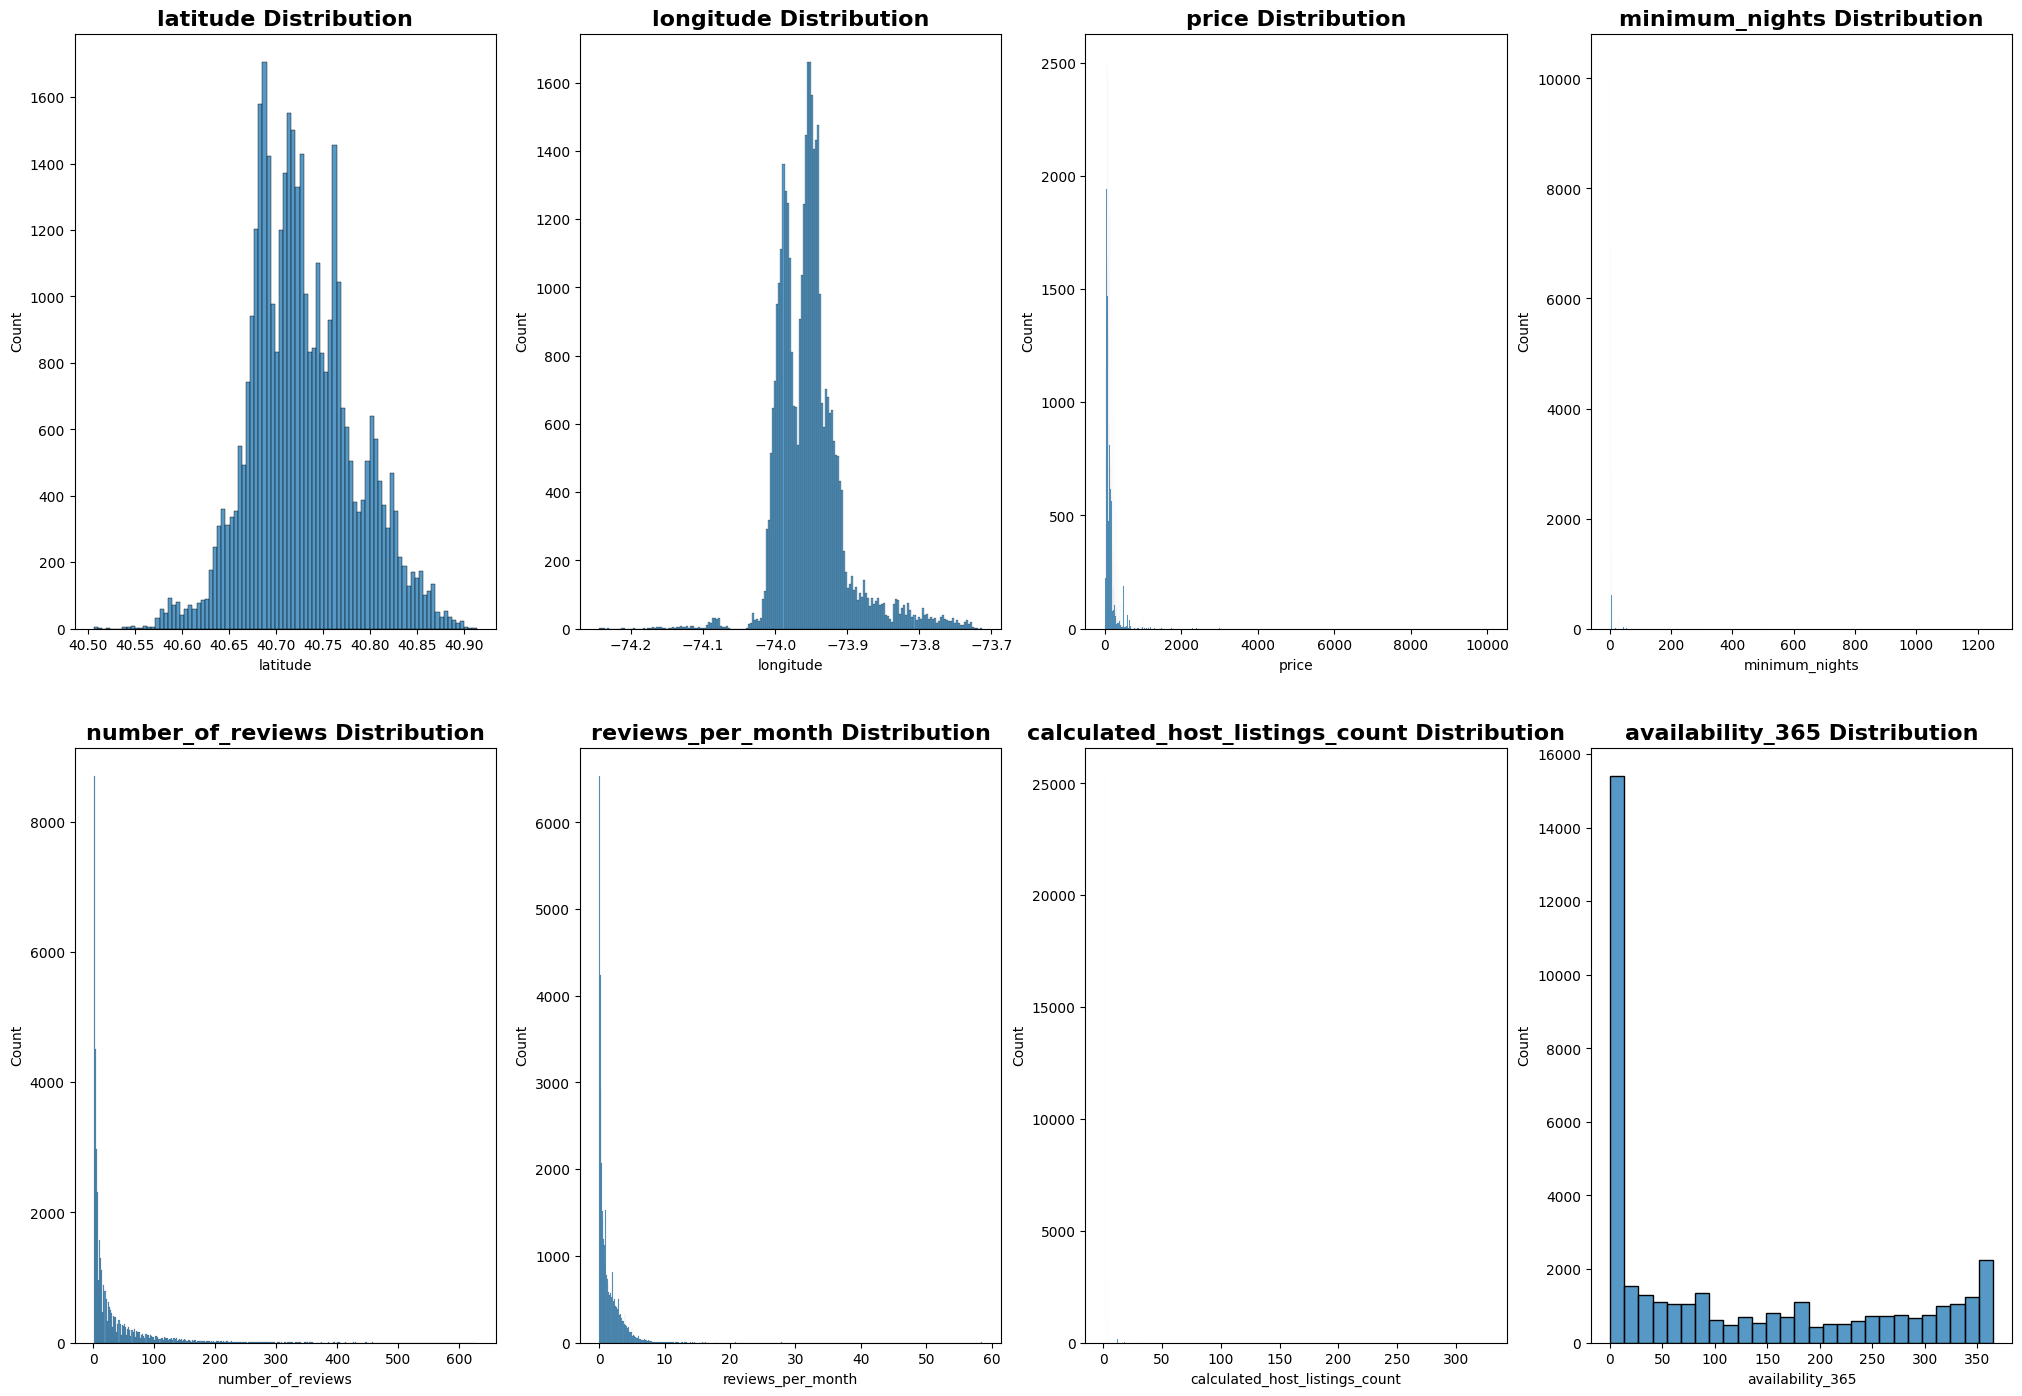

In [56]:
# Visualizing the distribution for every numeric feature
def draw_plot(data, val, rows, cols):
    fig, axes = plt.subplots(nrows=rows, ncols=cols)
    aux = 0
    fig.set_figheight(17)
    fig.set_figwidth(25)
    for row in axes:
        for col in row:
            sns.histplot(data, x=val[aux], ax=col)
            col.set_title(val[aux] +' Distribution',fontsize=16,fontweight='bold')
            aux+=1
            
draw_plot(data, numeric_features, 2, 4)

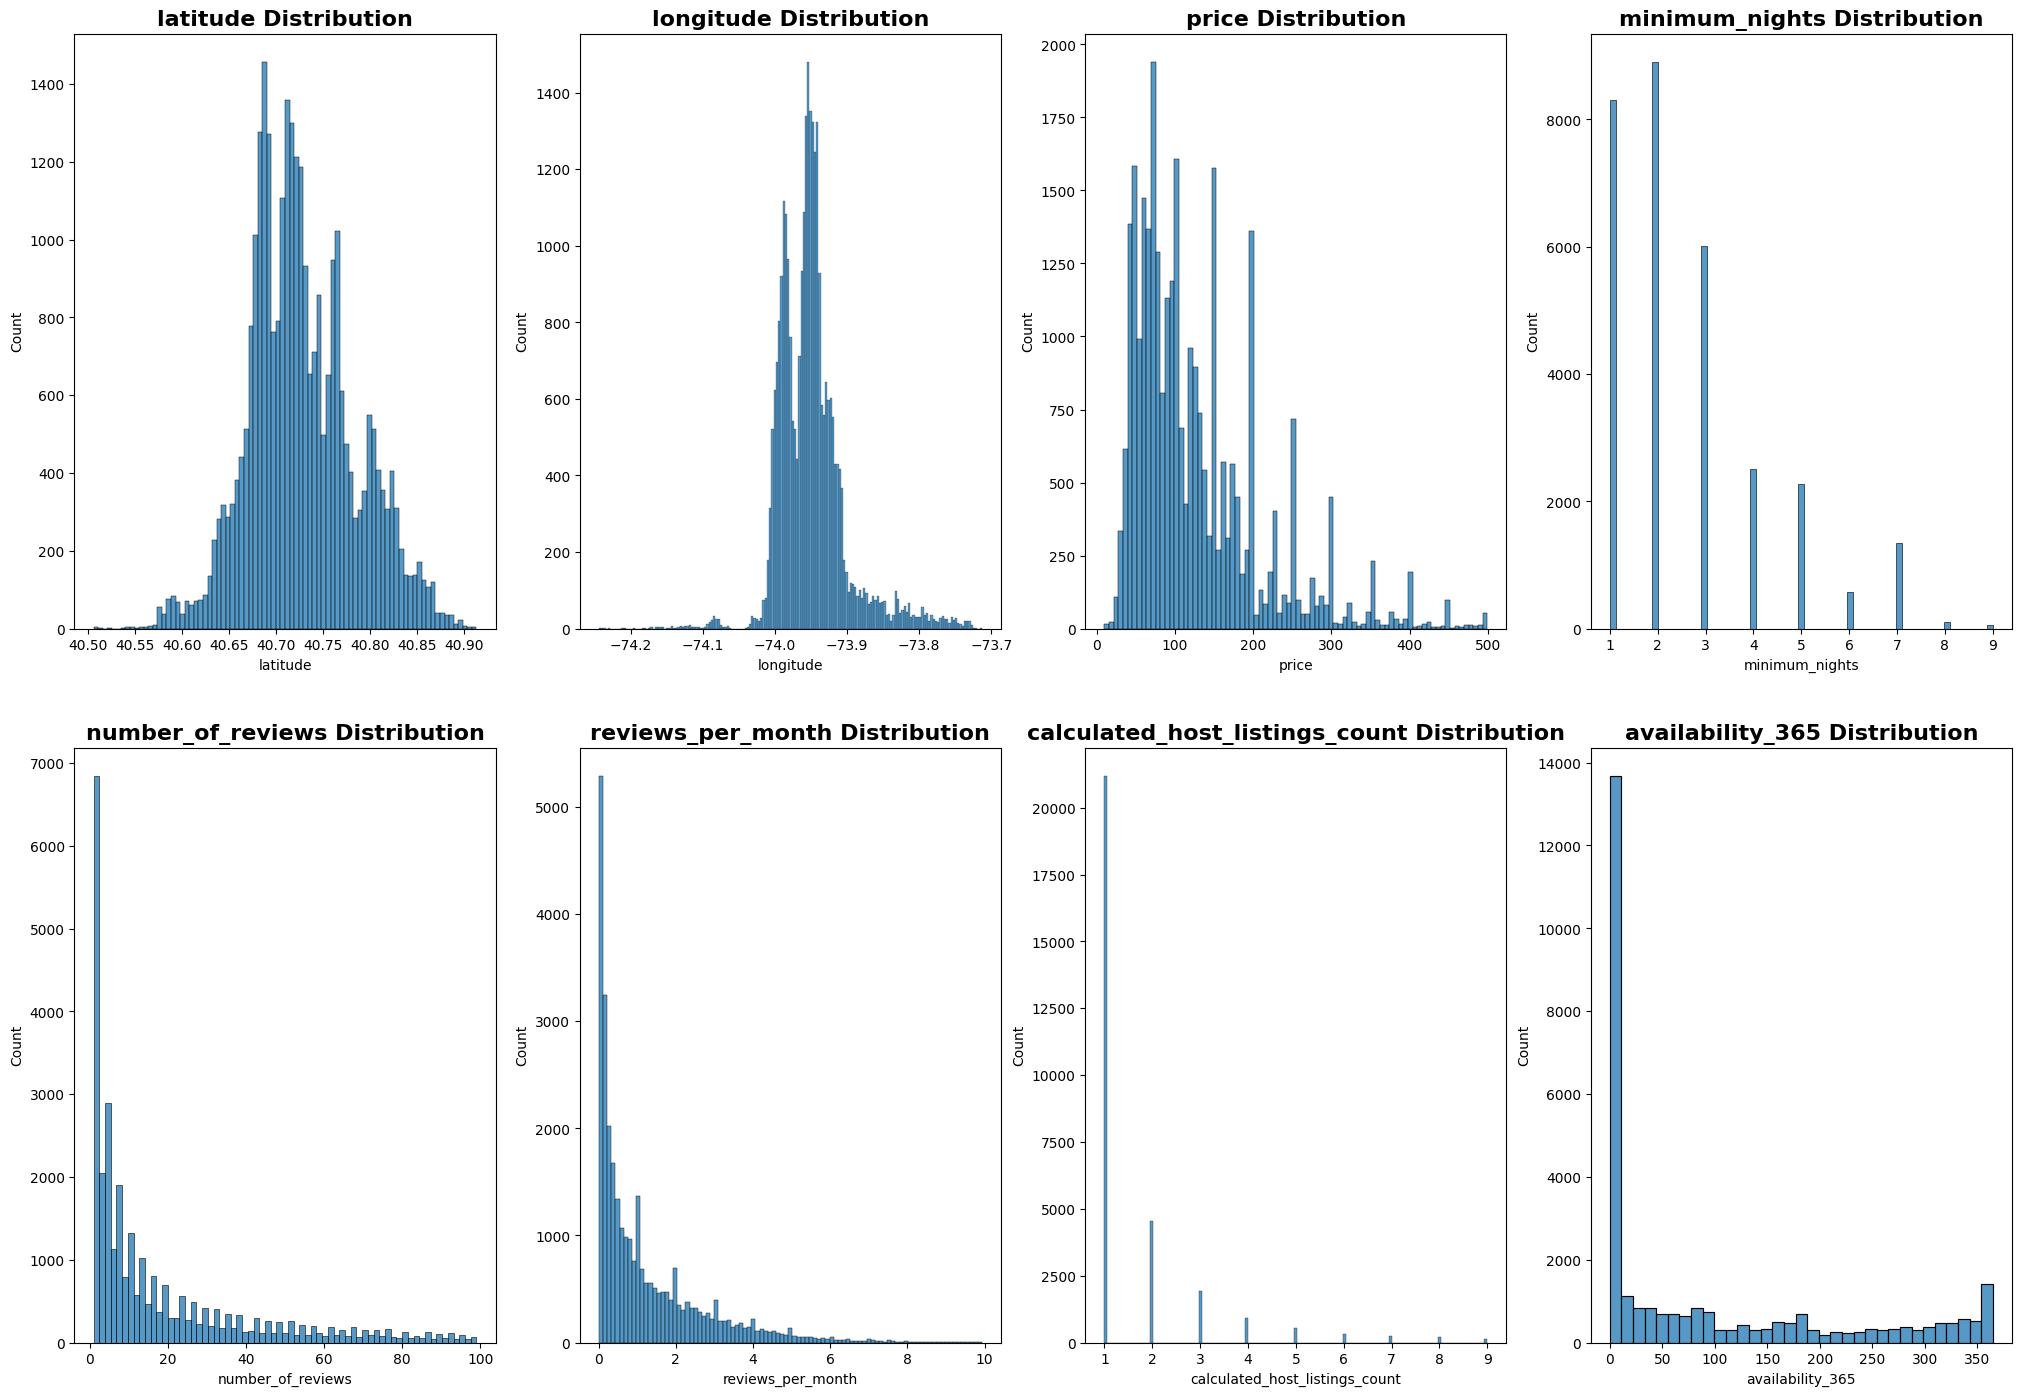

In [57]:
# Removing Outliers
data = data.copy()
data = data[data["price"]>0]
data = data[data["price"]<500]
data = data[data["minimum_nights"]<10]
data = data[data["number_of_reviews"]>0]
data = data[data["number_of_reviews"]<100]
data = data[data["reviews_per_month"]>0]
data = data[data["reviews_per_month"]<10]
data = data[data["calculated_host_listings_count"]<10]

draw_plot(data, numeric_features, 2, 4)

<Figure size 3000x3000 with 0 Axes>

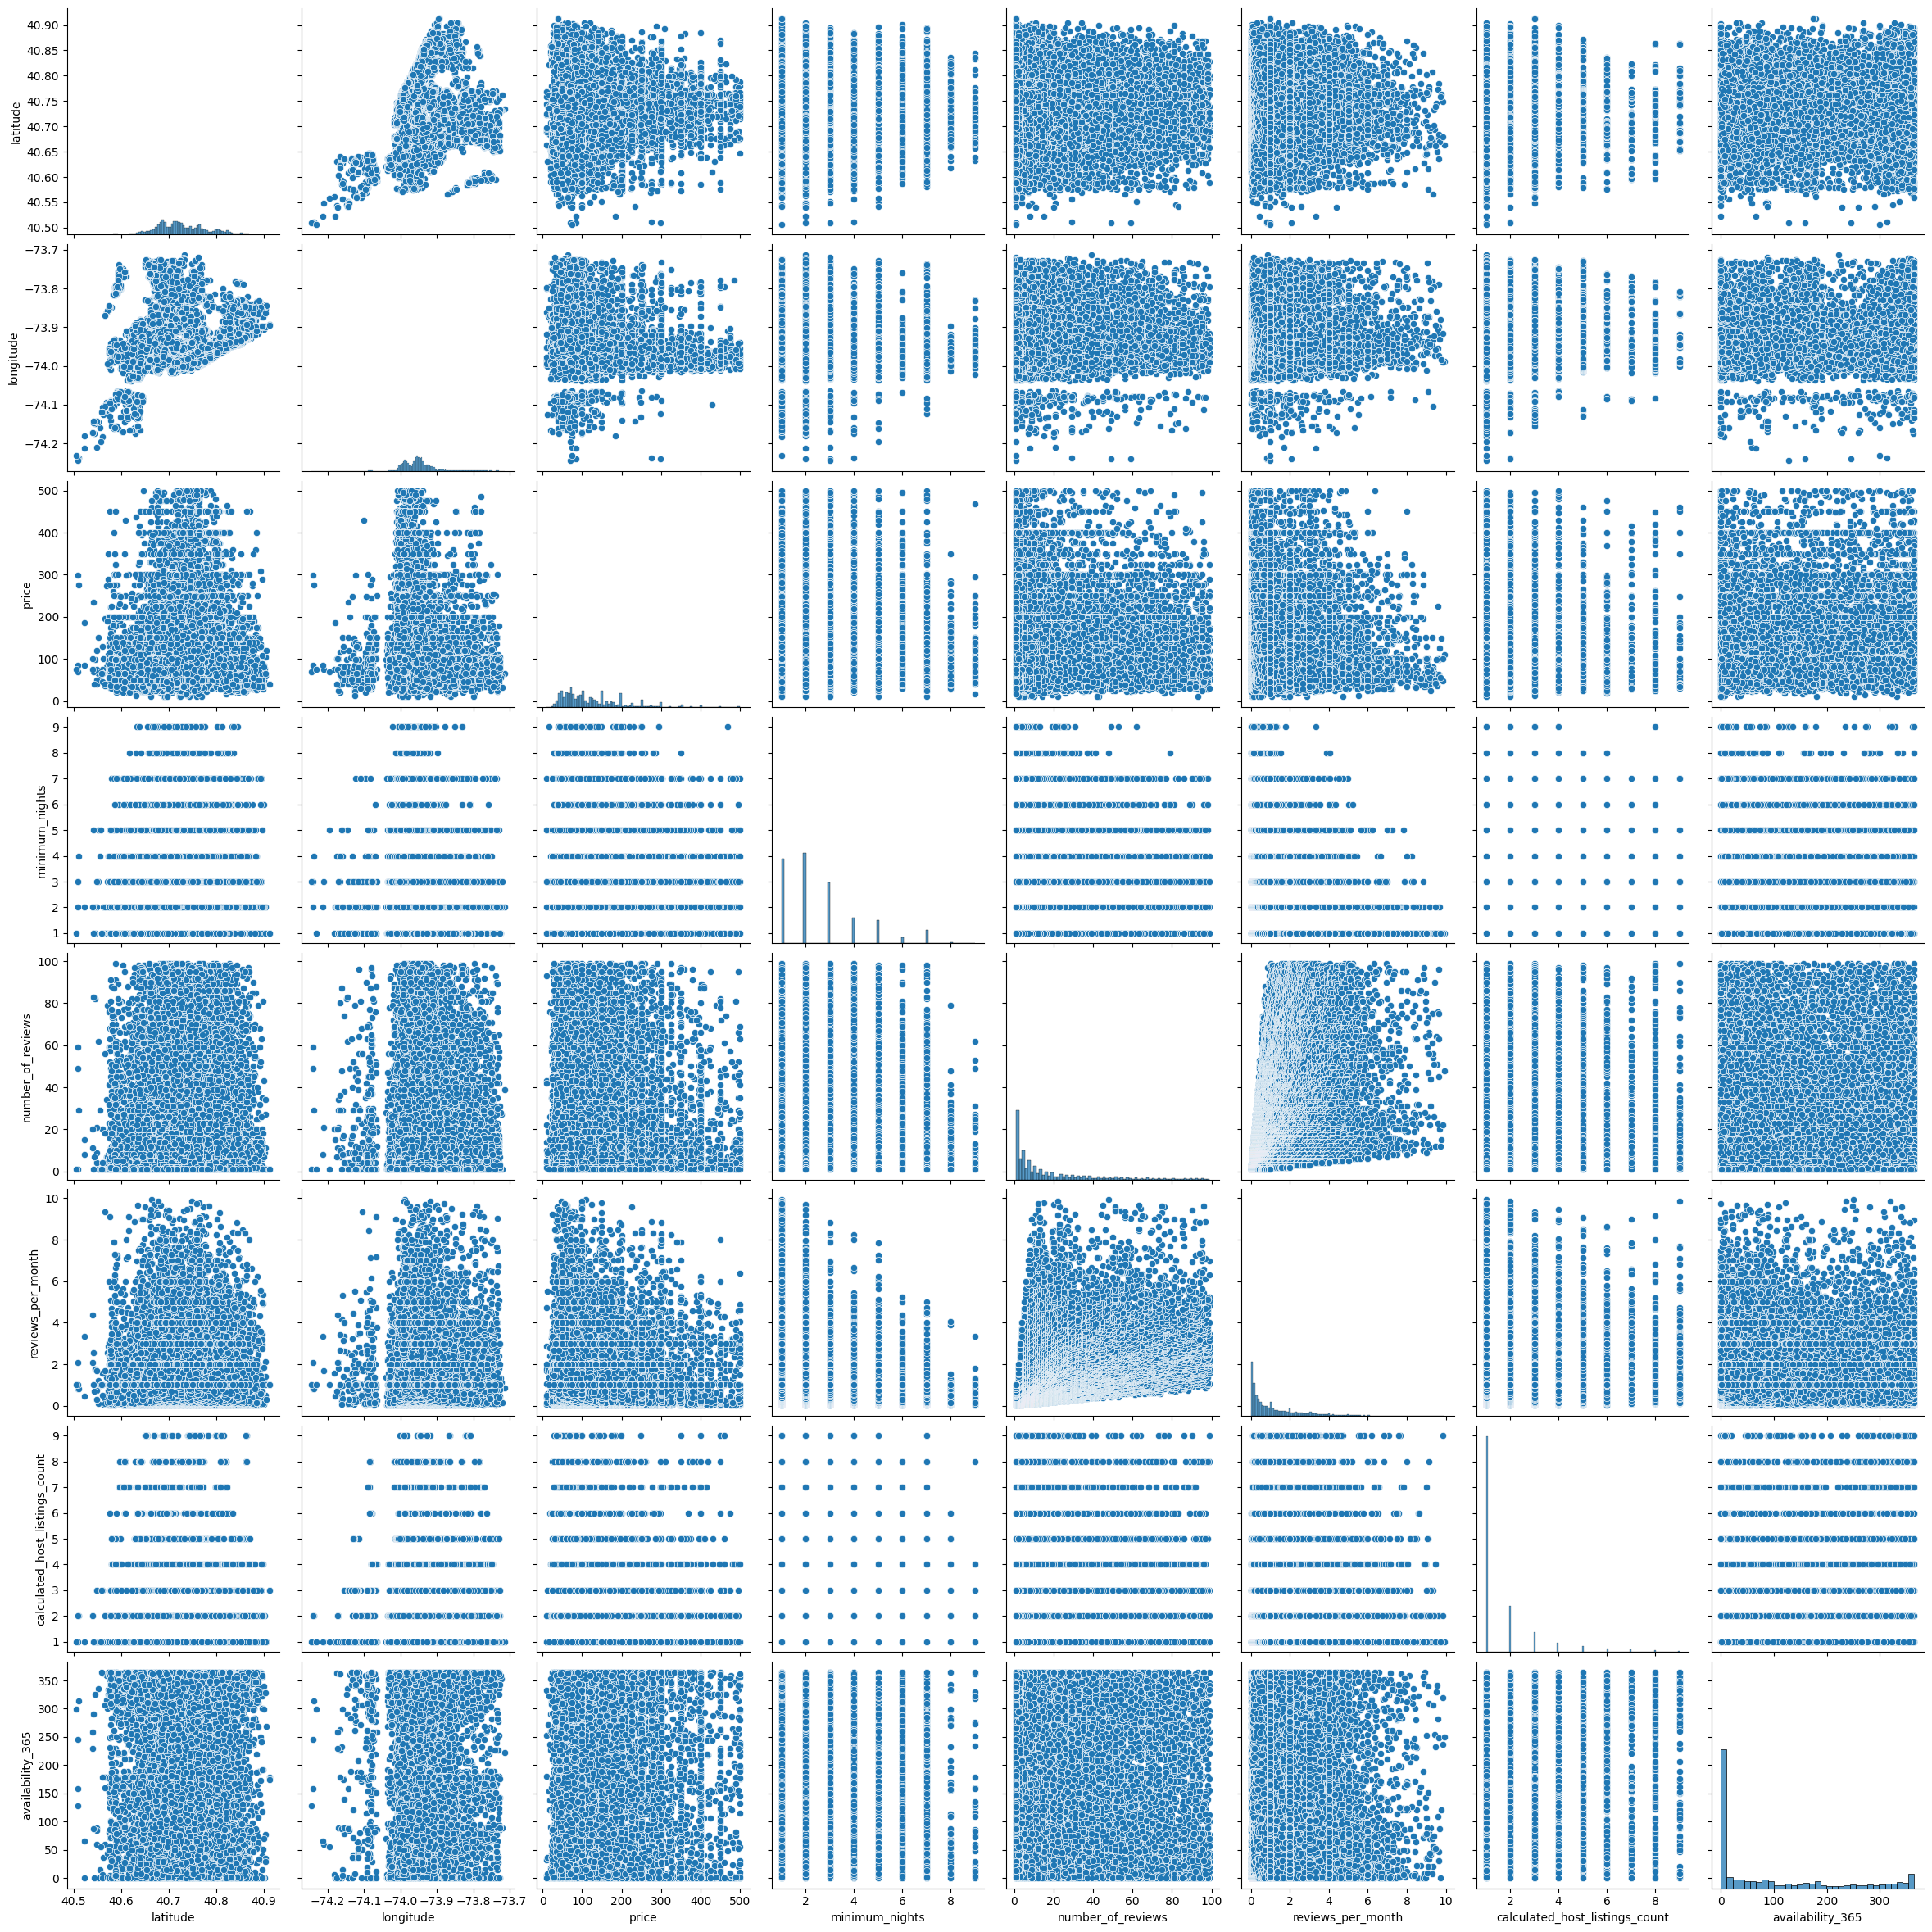

In [58]:
plt.figure(figsize=(30, 30))
sns.pairplot(data, height=3, diag_kind="hist")

##### We notice from the graphs that:
- latitude and longitude have a normal distribution, most of the hosts are concetrated in specific area. 
- price most the host has a price under $1000. 
- reviews_per_month most cases are less than 10. 

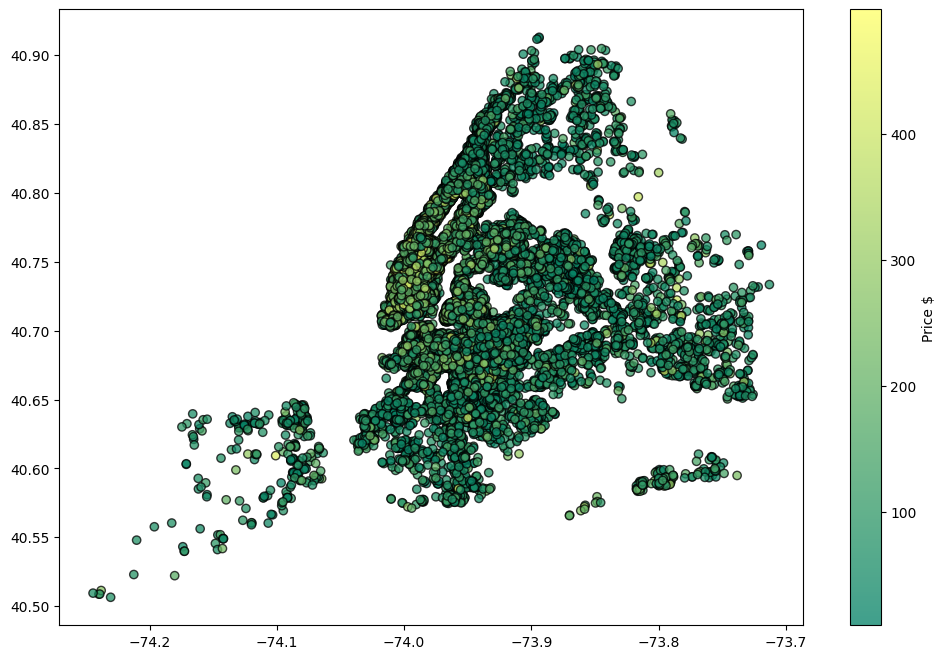

In [59]:
plt.figure(figsize=(12, 8))
plt.scatter(data.longitude, data.latitude, c=data.price, cmap='summer', edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('Price $')

<AxesSubplot: >

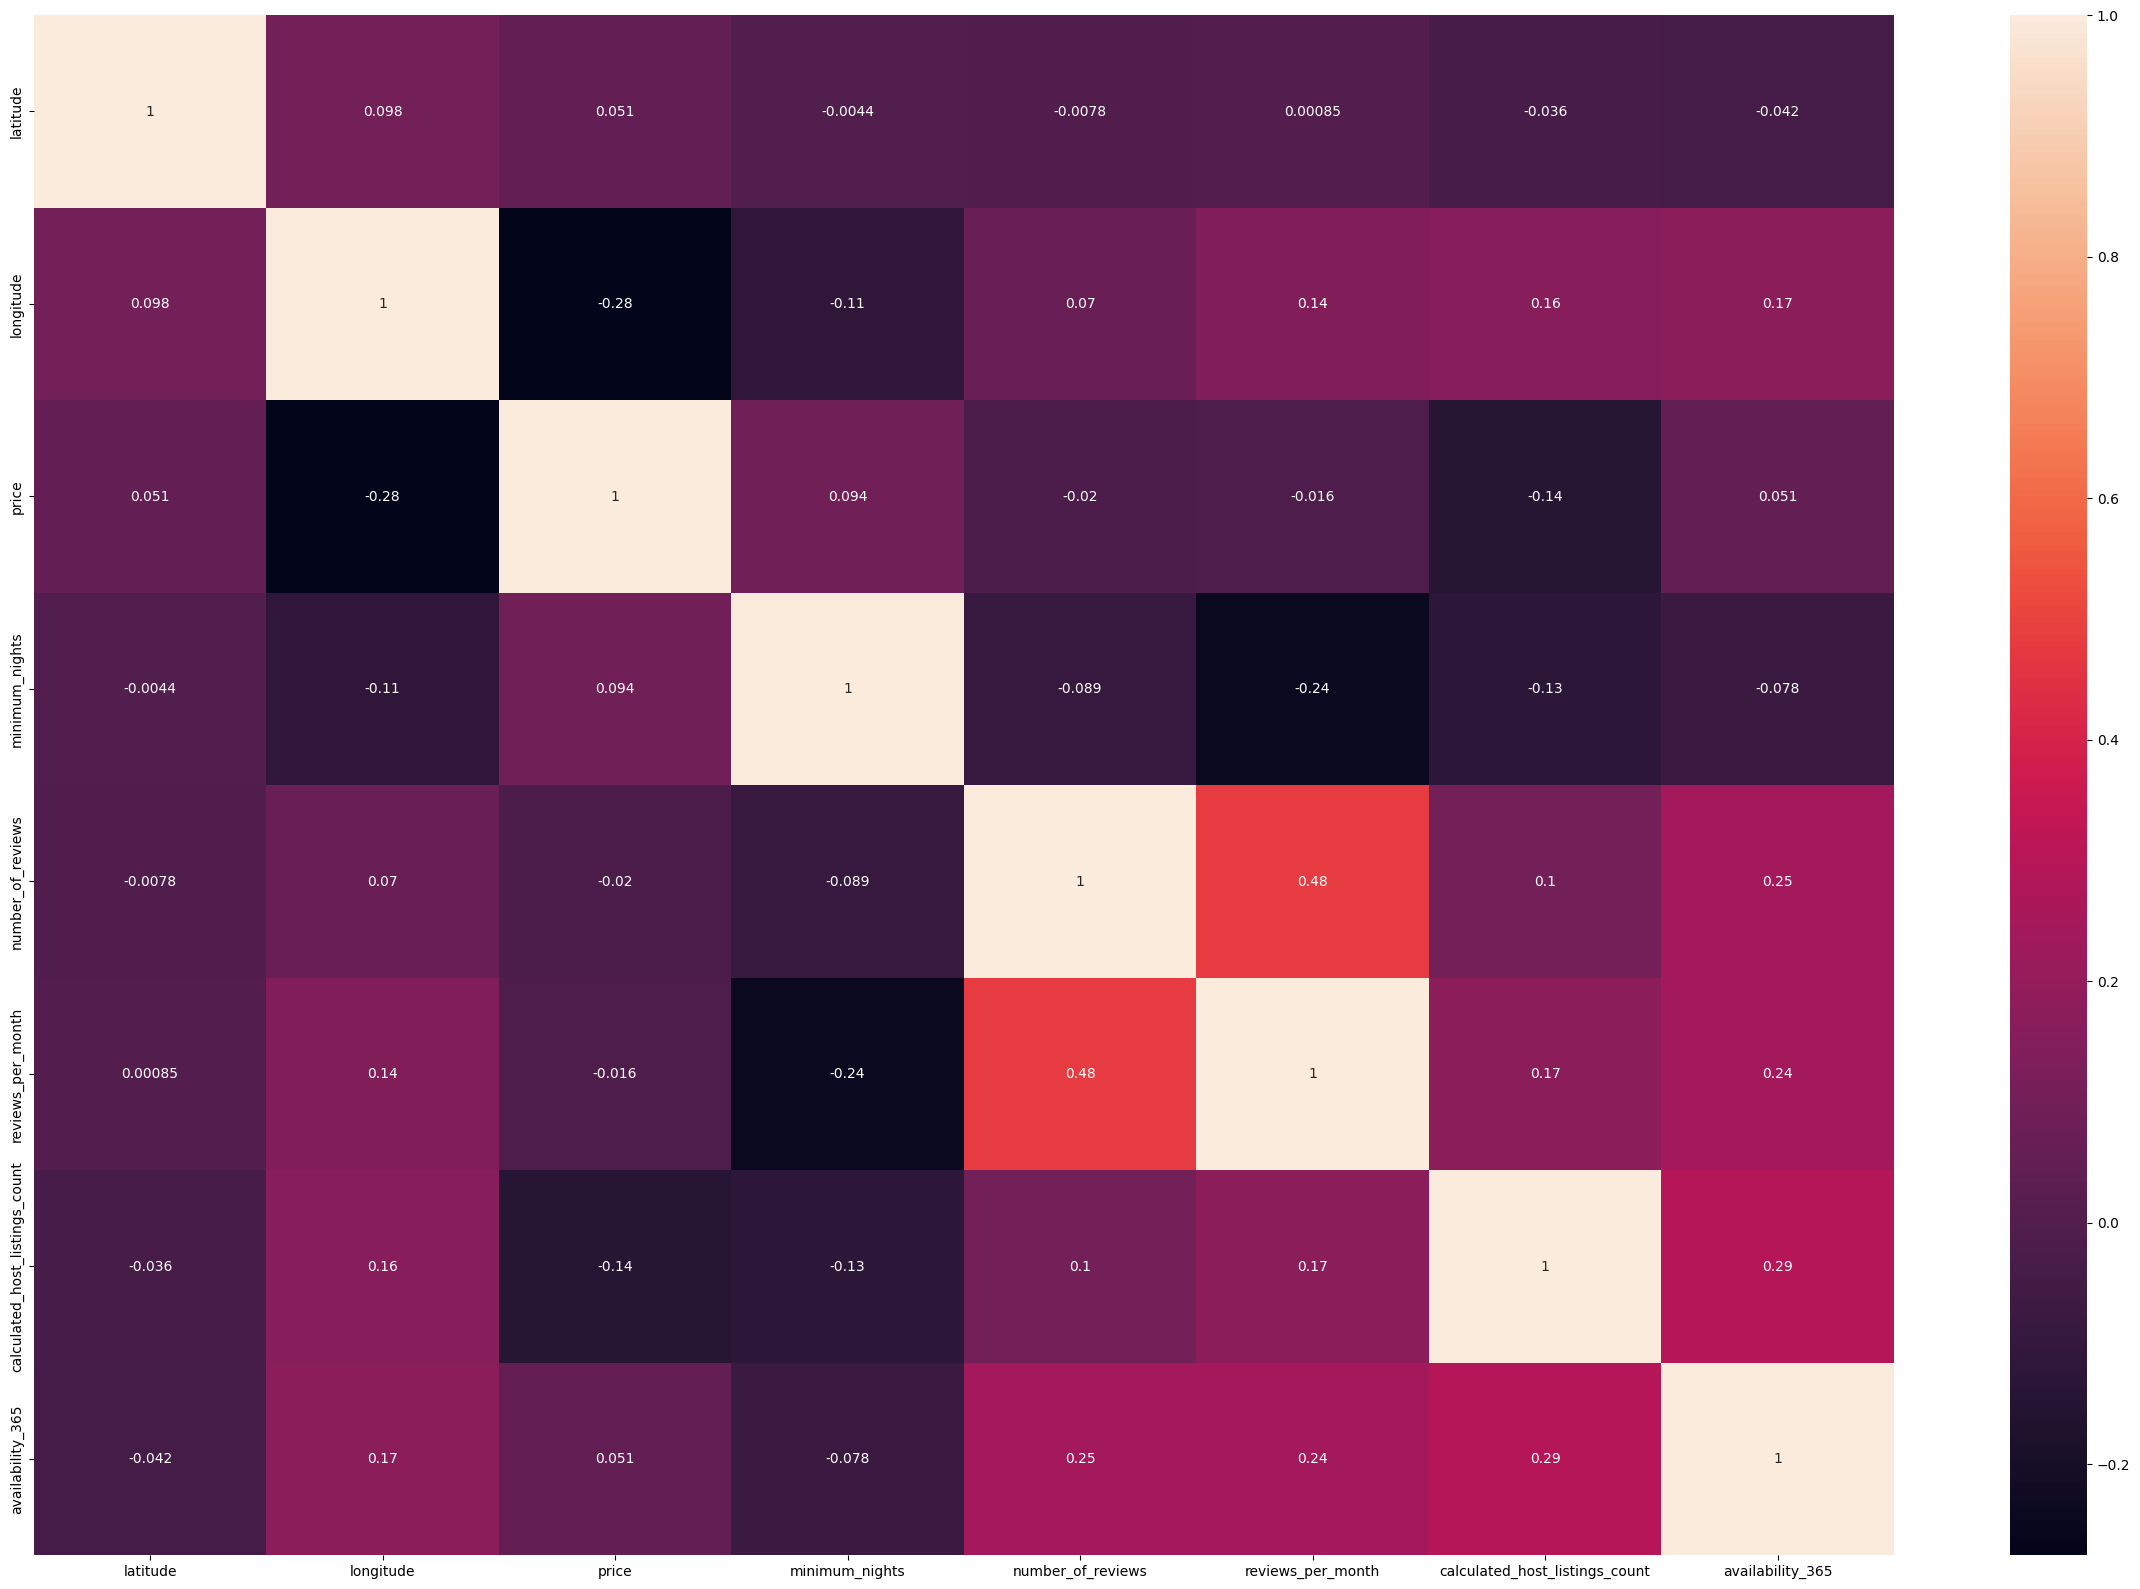

In [60]:
plt.figure(figsize=(30, 20))
sns.heatmap(data.corr(), annot=True)

#### 2.2 Visualize categorical features

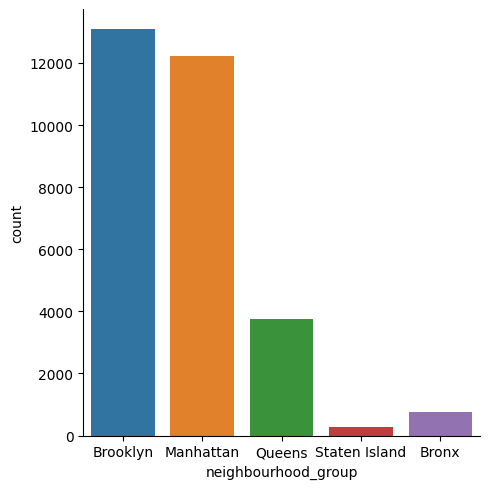

In [61]:
sns.catplot(data, x="neighbourhood_group", kind="count")

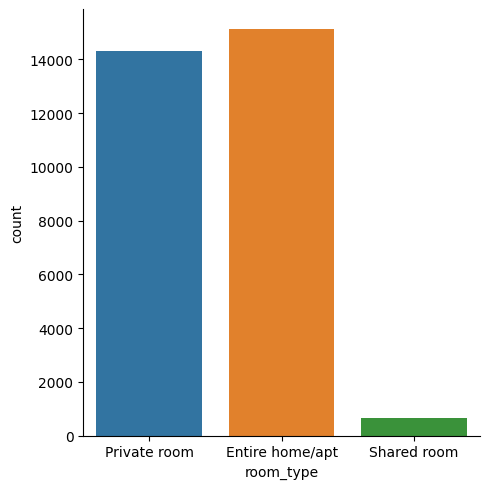

In [62]:
sns.catplot(data, x="room_type", kind="count")

<BarContainer object of 10 artists>

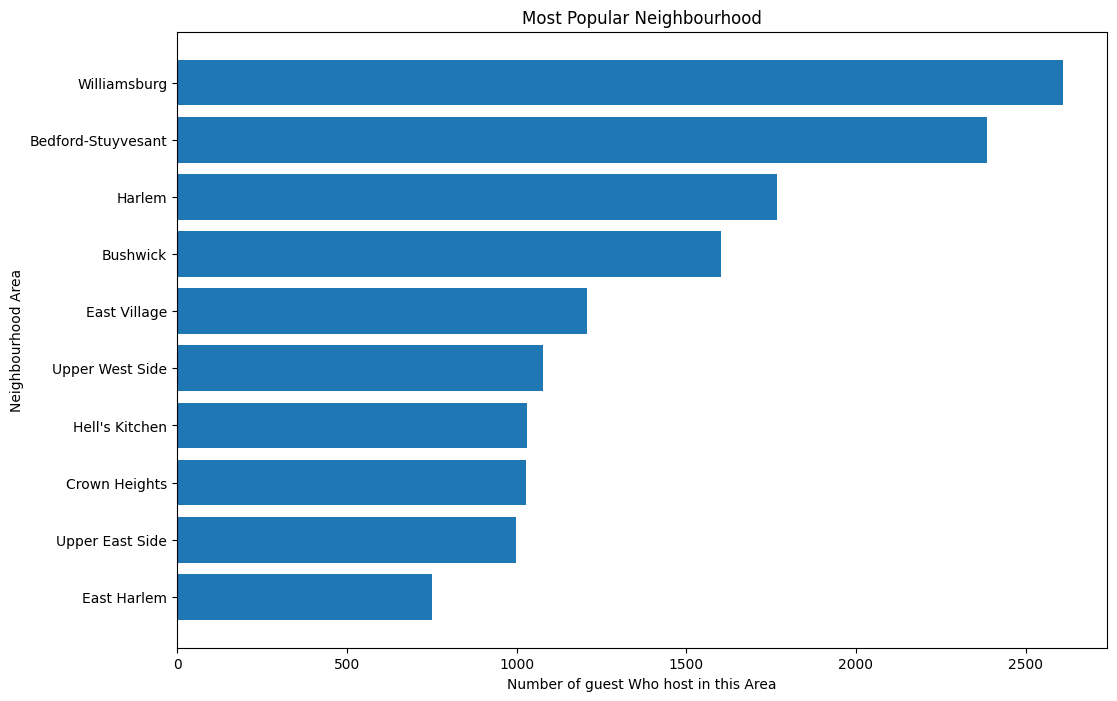

In [63]:
df = data.neighbourhood.value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(df.index)
y = list(df.values)
x.reverse()
y.reverse()

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest Who host in this Area")

plt.barh(x, y)

#### 3. Handle categorical features

In [64]:
categorical_features

Index(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object')

In [67]:
categorical_features = categorical_features.drop(["neighbourhood"])
categorical_features

KeyError: "['neighbourhood'] not found in axis"

In [68]:
data = pd.get_dummies(data, columns=categorical_features)
data.head()

neighbourhood  latitude  longitude  price  minimum_nights  \
0        Kensington     40.65     -73.97    149               1   
1           Midtown     40.75     -73.98    225               1   
5       Murray Hill     40.75     -73.97    200               3   
10  Upper West Side     40.80     -73.97    135               5   
18    Crown Heights     40.68     -73.95     99               3   

    number_of_reviews last_review  reviews_per_month  \
0                   9  2018-10-19               0.21   
1                  45  2019-05-21               0.38   
5                  74  2019-06-22               0.59   
10                 53  2019-06-22               0.43   
18                 53  2019-06-22               4.44   

    calculated_host_listings_count  availability_365  \
0                                6               365   
1                                2               355   
5                                1               129   
10                               1                 6   
18                               1                21   

    neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
0                           0                             1   
1                           0                             0   
5                           0                             0   
10                          0                             0   
18                          0                             1   

    neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
0                               0                           0   
1                               1                           0   
5                               1                           0   
10                              1                           0   
18                              0                           0   

    neighbourhood_group_Staten Island  room_type_Entire home/apt  \
0                                   0                          0   
1                                   0                          1   
5                                   0                          1   
10                                  0                          1   
18                                  0                          1   

    room_type_Private room  room_type_Shared room  
0                        1                      0  
1                        0                      0  
5                        0                      0  
10                       0                      0  
18                       0                      0

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

col_to_scale = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                'calculated_host_listings_count', 'availability_365']

sc = StandardScaler()
data[col_to_scale] = sc.fit_transform(data[col_to_scale])

label = LabelEncoder()
data['neighbourhood'] = label.fit_transform(data['neighbourhood'])
data.head()

neighbourhood  latitude  longitude  price  minimum_nights  \
0             106     40.65     -73.97    149           -1.00   
1             125     40.75     -73.98    225           -1.00   
5             135     40.75     -73.97    200            0.21   
10            199     40.80     -73.97    135            1.43   
18             51     40.68     -73.95     99            0.21   

    number_of_reviews last_review  reviews_per_month  \
0               -0.44  2018-10-19              -0.71   
1                1.13  2019-05-21              -0.59   
5                2.40  2019-06-22              -0.45   
10               1.48  2019-06-22              -0.56   
18               1.48  2019-06-22               2.14   

    calculated_host_listings_count  availability_365  \
0                             3.29              2.20   
1                             0.28              2.12   
5                            -0.48              0.28   
10                           -0.48             -0.73   
18                           -0.48             -0.60   

    neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
0                           0                             1   
1                           0                             0   
5                           0                             0   
10                          0                             0   
18                          0                             1   

    neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
0                               0                           0   
1                               1                           0   
5                               1                           0   
10                              1                           0   
18                              0                           0   

    neighbourhood_group_Staten Island  room_type_Entire home/apt  \
0                                   0                          0   
1                                   0                          1   
5                                   0                          1   
10                                  0                          1   
18                                  0                          1   

    room_type_Private room  room_type_Shared room  
0                        1                      0  
1                        0                      0  
5                        0                      0  
10                       0                      0  
18                       0                      0

In [79]:
print(data.describe().loc["mean", :])
print("====================================")
print(data.describe().loc["std", :])

neighbourhood                       104.09
latitude                             40.73
longitude                           -73.95
price                               127.00
minimum_nights                        0.00
number_of_reviews                     0.00
reviews_per_month                    -0.00
calculated_host_listings_count        0.00
availability_365                      0.00
neighbourhood_group_Bronx             0.02
neighbourhood_group_Brooklyn          0.44
neighbourhood_group_Manhattan         0.41
neighbourhood_group_Queens            0.13
neighbourhood_group_Staten Island     0.01
room_type_Entire home/apt             0.50
room_type_Private room                0.48
room_type_Shared room                 0.02
Name: mean, dtype: float64
neighbourhood                       68.24
latitude                             0.06
longitude                            0.05
price                               82.43
minimum_nights                       1.00
number_of_reviews               

#### 5.Model Building

In [88]:
from sklearn.model_selection import train_test_split
X = data.drop(["price", "last_review"], axis=1)
y = data.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=47)

In [89]:
from sklearn import metrics

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

In [90]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [91]:
print_evaluate(y_test, lin_reg.predict(X_test))

MAE: 42.416695470659725
MSE: 3771.969569768225
RMSE: 61.41636239446476
R2 Square 0.4408678533354744


In [92]:
y.mean()

127.00116391207476